In [1]:
import math
from PIL import ImageTk, Image, ImageDraw
import PIL
from tkinter import Tk, Canvas, Button, Label
from matplotlib import pyplot as plt
import matplotlib
import numpy as np

In [2]:
from keras.models import load_model

Using TensorFlow backend.


In [3]:
model = load_model('../../../Models/Digit-Recognition/CNN.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


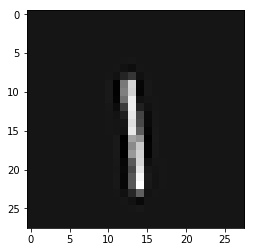

1
String 1
String 1//


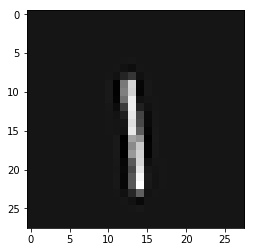

1
String 1//1
String 1//1+


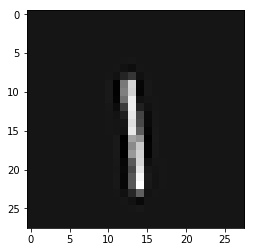

1
String 1//1+1
String 2


In [15]:
white = (255, 255, 255)
black = (0, 0, 0)

window = Tk()
window.title("Handwriting Calculator (Integer)")
window.geometry('220x165')


LABEL_TEXT = ""

lbl = Label(window, text='',font=('Arial Bold',20))
lbl.grid(column=1, row=1, columnspan=2)

def fun(op):
    global LABEL_TEXT
    LABEL_TEXT += op
    lbl.config(text=LABEL_TEXT)
    print('String', LABEL_TEXT)

def eql():
    global LABEL_TEXT
    LABEL_TEXT = eval(LABEL_TEXT)
    lbl.config(text=LABEL_TEXT)
    print('String', LABEL_TEXT)

def dlt():
    global LABEL_TEXT
    LABEL_TEXT = LABEL_TEXT[:-1]
    lbl.config(text=LABEL_TEXT)
    print('String', LABEL_TEXT)
    
def rst():
    cv.delete('all')
    global LABEL_TEXT
    LABEL_TEXT = ''
    lbl.config(text=LABEL_TEXT)
    print('String', LABEL_TEXT)

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])    
    
def save(image):
#     image.save('image.png')
    img = np.asarray(image)
    gray = rgb2gray(img)    
    rescaled = np.array(Image.fromarray(gray).resize((28, 28), Image.ANTIALIAS))
    M = rescaled.max()
    m = rescaled.min()
    rescaled = rescaled.astype('float32')
    rescaled -= m
    rescaled /= (M-m)
    rescaled = 1 - rescaled
    plt.imshow(rescaled, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
    plt.show()
#     print(rescaled)
    digit = model.predict_classes(rescaled.reshape(-1,28,28,1))[0]
    print(digit)
    global LABEL_TEXT
    LABEL_TEXT += str(digit)
    lbl.config(text=LABEL_TEXT)
    print('String', LABEL_TEXT)
    
def paint(event):
    x1, y1 = (event.x - 1), (event.y - 1)
    x2, y2 = (event.x + 1), (event.y + 1)
    cv.create_oval(x1, y1, x2, y2, fill="black",width=5)
    draw.line([x1, y1, x2, y2],fill="black",width=5)

cv = Canvas(window, width=120, height=120, bg='white')
cv.grid(column=1,row=2, rowspan=4)
image = PIL.Image.new("RGB", (120, 120), white)
draw = ImageDraw.Draw(image)
cv.bind("<B1-Motion>", paint)


btn_add = Button(window, text='+', width=5, command=lambda: fun('+'))
btn_add.grid(column=2,row=2)

btn_sub = Button(window, text='-', width=5, command=lambda: fun('-'))
btn_sub.grid(column=2,row=3)

btn_mul = Button(window, text='*', width=5, command=lambda: fun('*'))
btn_mul.grid(column=2,row=4)

btn_div = Button(window, text='/', width=5, command=lambda: fun('//'))
btn_div.grid(column=2,row=5)

btn_sv = Button(window, text='save', width=5, command=lambda: save(image))
btn_sv.grid(column=3,row=2)

btn_eql = Button(window, text='=', width=5, command=lambda: eql())
btn_eql.grid(column=3,row=3)

btn_dlt = Button(window, text='<-', width=5, command=lambda: dlt())
btn_dlt.grid(column=3,row=4)

btn_rst = Button(window, text='reset', width=5, command=rst)
btn_rst.grid(column=3,row=5)

window.mainloop()